# KB Mirrors

This example simulates the alignment of a KB mirror endstation (with four degrees of freedom).

In [1]:
from blop.utils import prepare_re_env  # noqa

%run -i $prepare_re_env.__file__ --db-type=temp
bec.disable_plots()

In [2]:
from blop.sim import Beamline

beamline = Beamline(name="bl")

In [3]:
from blop import DOF, Agent, Objective
from blop.digestion import beam_stats_digestion

dofs = [
    DOF(description="KBV downstream", device=beamline.kbv_dsv, search_domain=(-5.0, 5.0)),
    DOF(description="KBV upstream", device=beamline.kbv_usv, search_domain=(-5.0, 5.0)),
    DOF(description="KBH downstream", device=beamline.kbh_dsh, search_domain=(-5.0, 5.0)),
    DOF(description="KBH upstream", device=beamline.kbh_ush, search_domain=(-5.0, 5.0)),
]

objectives = [
    Objective(name="bl_det_sum", target="max", transform="log", trust_domain=(200, np.inf)),
    Objective(name="bl_det_wid_x", target="min", transform="log", latent_groups=[("bl_kbh_dsh", "bl_kbh_ush")]),
    Objective(name="bl_det_wid_y", target="min", transform="log", latent_groups=[("bl_kbv_dsv", "bl_kbv_usv")]),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    detectors=[beamline.det],
    digestion=beam_stats_digestion,
    digestion_kwargs={"image_key": "bl_det_image"},
    verbose=True,
    db=db,
    tolerate_acquisition_errors=False,
    enforce_all_objectives_valid=True,
    train_every=3,
)

(uid,) = RE(agent.learn("qr", n=32))

2025-03-04 22:06:15.709 INFO: Executing plan <generator object Agent.learn at 0x7ff7fabf5e00>


2025-03-04 22:06:15.713 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7ff7fac435e0> from 'idle' -> 'running'


2025-03-04 22:06:15.715 INFO: running iteration 1 / 1




Transient Scan ID: 1     Time: 2025-03-04 22:06:15

Persistent Unique Scan ID: 'a55338ba-fb5d-4329-87a7-256122d77a97'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:15.8 |     -0.933 |     -0.776 |      0.694 |     -0.786 |    519.792 |      169.338 |      151.435 |       33.210 |       73.381 |

|         2 | 22:06:15.9 |      0.114 |     -0.522 |     -1.192 |     -1.318 |    486.889 |      195.924 |      139.882 |       92.549 |       47.853 |

|         3 | 22:06:16.0 |      3.974 |      2.643 |      0.948 |     -4.234 |    205.351 |      128.714 |      129.384 |       52.901 |       89.121 |

|         4 | 22:06:16.1 |      1.085 |      1.200 |      2.055 |     -3.434 |    198.397 |      112.769 |      150.832 |       24.411 |       10.144 |

|         5 | 22:06:16.2 |      1.332 |     -2.548 |      4.493 |     -4.674 |     -4.190 |      200.496 |      142.552 |      385.416 |      223.388 |

|         6 | 22:06:16.3 |      3.609 |     -1.099 |      3.744 |     -2.974 |      0.847 |      179.356 |      142.659 |      258.100 |      236.606 |

|         7 | 22:06:16.4 |      4.486 |      1.637 |      2.956 |      2.187 |    375.099 |      182.770 |      113.100 |      105.840 |       69.060 |

|         8 | 22:06:16.4 |      2.089 |     -1.699 |      1.285 |      1.728 |    499.753 |      208.048 |       93.105 |       55.513 |       31.752 |

|         9 | 22:06:16.5 |      2.931 |     -4.624 |      0.478 |      0.928 |     53.080 |      207.943 |       79.715 |       18.299 |       10.235 |

|        10 | 22:06:16.6 |     -0.020 |     -4.751 |      2.584 |      3.106 |    191.022 |      207.107 |      110.763 |      112.493 |       65.503 |

|        11 | 22:06:16.7 |     -4.961 |     -1.426 |      4.335 |      4.532 |     33.673 |      197.568 |      172.789 |      169.313 |       98.309 |

|        12 | 22:06:16.8 |     -3.674 |     -4.097 |     -0.136 |      1.333 |     43.871 |      228.160 |      148.361 |       17.570 |      130.728 |

|        13 | 22:06:16.8 |     -4.126 |     -3.077 |      2.387 |     -1.860 |     76.933 |      114.053 |      150.874 |       21.217 |      128.938 |

|        14 | 22:06:16.9 |     -3.135 |      0.675 |      4.787 |     -0.619 |    135.217 |      118.604 |      189.972 |       34.965 |       60.588 |

|        15 | 22:06:17.0 |     -1.807 |      2.982 |      3.372 |     -2.046 |     50.847 |      101.054 |      217.000 |        5.137 |       11.300 |

|        16 | 22:06:17.1 |      0.494 |      4.569 |      4.041 |      0.487 |    259.930 |      139.724 |      199.775 |       72.689 |       43.224 |

|        17 | 22:06:17.2 |     -2.779 |      4.806 |      1.617 |      3.292 |     -4.355 |      207.482 |      146.955 |      292.613 |      246.250 |

|        18 | 22:06:17.3 |     -2.241 |      1.487 |      0.224 |      4.366 |    268.199 |      263.615 |      198.762 |       63.469 |       44.499 |

|        19 | 22:06:17.4 |      1.732 |      2.211 |     -0.429 |      3.531 |    432.191 |      272.132 |      156.054 |       47.619 |       40.042 |

|        20 | 22:06:17.5 |      3.210 |      3.966 |     -1.489 |      3.824 |    151.495 |      291.033 |      159.833 |       14.063 |       98.817 |

|        21 | 22:06:17.6 |      2.313 |      3.236 |     -3.480 |     -0.078 |    317.890 |      249.563 |      161.416 |       88.570 |       66.726 |

|        22 | 22:06:17.6 |      2.706 |      0.617 |     -4.602 |     -2.284 |    184.699 |      217.714 |      117.828 |      145.279 |       27.604 |

|        23 | 22:06:17.7 |      4.866 |     -3.135 |     -1.967 |     -1.025 |      0.650 |      197.964 |      152.143 |      378.064 |      273.199 |

|        24 | 22:06:17.8 |      4.217 |     -2.266 |     -3.816 |      2.564 |      0.040 |      210.951 |      127.416 |      329.553 |      205.695 |

|        25 | 22:06:17.9 |      0.841 |     -4.028 |     -3.025 |      4.771 |      1.466 |      211.288 |      139.600 |      349.983 |      203.563 |

|        26 | 22:06:18.0 |     -1.267 |     -2.109 |     -1.861 |      1.000 |    407.400 |      255.818 |      136.976 |       49.179 |      101.819 |

|        27 | 22:06:18.0 |     -2.151 |     -3.740 |     -4.856 |     -2.579 |     31.135 |      226.992 |      141.189 |      130.392 |       94.925 |

|        28 | 22:06:18.1 |     -0.578 |      0.008 |     -2.339 |     -3.839 |    209.598 |      182.218 |      158.177 |      147.294 |       49.504 |

|        29 | 22:06:18.2 |     -2.868 |     -0.103 |     -3.147 |     -4.746 |     25.727 |      181.565 |      183.604 |      145.035 |       70.733 |

|        30 | 22:06:18.3 |     -4.402 |      3.639 |     -0.899 |     -3.506 |      0.265 |      161.526 |      170.967 |      302.631 |      222.167 |

|        31 | 22:06:18.4 |     -4.056 |      2.165 |     -2.692 |      0.092 |    132.320 |      251.665 |      210.953 |       80.949 |       23.188 |

|        32 | 22:06:18.5 |     -1.003 |      4.159 |     -4.070 |      2.260 |     37.465 |      289.478 |      218.208 |       16.699 |        9.933 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['a55338ba'] (scan num: 1)

2025-03-04 22:06:21.720 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7ff7fac435e0> from 'running' -> 'idle'


2025-03-04 22:06:21.721 INFO: Cleaned up from plan <generator object Agent.learn at 0x7ff7fabf5e00>


In [4]:
RE(agent.learn("qei", n=4, iterations=4))

2025-03-04 22:06:21.730 INFO: Executing plan <generator object Agent.learn at 0x7ff7f12ed380>


2025-03-04 22:06:21.733 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7ff7fac435e0> from 'idle' -> 'running'


2025-03-04 22:06:21.734 INFO: running iteration 1 / 4




Transient Scan ID: 2     Time: 2025-03-04 22:06:24

Persistent Unique Scan ID: '986a0ad4-f3d2-4d4b-9a98-34a01e6f6338'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:24.3 |     -0.342 |     -0.544 |     -1.726 |     -1.253 |    441.855 |      208.524 |      145.647 |      105.800 |       56.219 |

|         2 | 22:06:24.4 |      0.448 |      2.495 |      2.412 |     -1.747 |    544.002 |      116.026 |      179.722 |       18.974 |       20.528 |

|         3 | 22:06:24.4 |      0.324 |      2.316 |      1.114 |     -0.305 |    548.271 |      170.884 |      178.901 |       17.282 |       15.491 |

|         4 | 22:06:24.5 |      1.368 |     -1.132 |      1.139 |      1.561 |    531.034 |      207.444 |      111.564 |       47.455 |       35.567 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['986a0ad4'] (scan num: 2)

2025-03-04 22:06:25.843 INFO: running iteration 2 / 4




Transient Scan ID: 3     Time: 2025-03-04 22:06:30

Persistent Unique Scan ID: 'cd6a46d5-0a4f-406a-bd30-abb055650551'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:30.2 |      0.667 |      1.376 |      0.059 |      0.651 |    555.370 |      210.692 |      159.670 |       17.927 |        9.106 |

|         2 | 22:06:30.3 |     -0.309 |      2.071 |      2.089 |     -0.707 |    550.018 |      143.167 |      184.519 |       19.311 |        9.673 |

|         3 | 22:06:30.3 |     -0.827 |      2.609 |     -0.795 |      1.508 |    549.295 |      244.875 |      200.500 |       18.275 |        9.637 |

|         4 | 22:06:30.4 |     -4.585 |      1.879 |     -3.197 |      3.606 |      1.412 |      186.396 |      132.365 |      195.431 |      132.209 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['cd6a46d5'] (scan num: 3)

2025-03-04 22:06:31.741 INFO: running iteration 3 / 4




Transient Scan ID: 4     Time: 2025-03-04 22:06:35

Persistent Unique Scan ID: 'd88981d8-4a23-4352-89cf-23b2e9457363'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:35.5 |      0.557 |      1.369 |      4.400 |      5.000 |    105.345 |      201.608 |      161.021 |      172.054 |        8.888 |

|         2 | 22:06:35.6 |     -0.717 |      2.123 |      0.293 |      0.723 |    548.239 |      207.521 |      191.500 |       16.418 |       14.744 |

|         3 | 22:06:35.7 |     -0.539 |      2.633 |     -0.674 |      0.732 |    551.497 |      227.056 |      196.462 |       29.033 |        9.392 |

|         4 | 22:06:35.8 |      4.199 |      5.000 |     -5.000 |     -5.000 |     11.147 |      212.541 |      155.684 |      199.568 |      128.639 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['d88981d8'] (scan num: 4)

2025-03-04 22:06:37.149 INFO: running iteration 4 / 4




Transient Scan ID: 5     Time: 2025-03-04 22:06:41

Persistent Unique Scan ID: 'dc90e79c-4b18-4f22-ad1a-dbdcfb170a35'

New stream: 'primary'

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|   seq_num |       time | bl_kbv_dsv | bl_kbv_usv | bl_kbh_dsh | bl_kbh_ush | bl_det_sum | bl_det_cen_x | bl_det_cen_y | bl_det_wid_x | bl_det_wid_y |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

|         1 | 22:06:41.4 |      0.530 |      1.537 |      1.383 |     -1.361 |    545.368 |      144.375 |      164.011 |       30.587 |        8.789 |

|         2 | 22:06:41.4 |      0.627 |      1.371 |      1.746 |     -1.014 |    542.240 |      143.809 |      160.020 |       17.732 |        8.760 |

|         3 | 22:06:41.5 |     -0.183 |      2.185 |     -0.309 |      1.723 |    546.536 |      239.500 |      184.315 |       19.357 |        8.976 |

|         4 | 22:06:41.6 |     -1.521 |      3.542 |      0.156 |      1.673 |    235.897 |      229.500 |      221.529 |       26.000 |        4.423 |

+-----------+------------+------------+------------+------------+------------+------------+--------------+--------------+--------------+--------------+

generator list_scan ['dc90e79c'] (scan num: 5)

2025-03-04 22:06:42.930 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7ff7fac435e0> from 'running' -> 'idle'


2025-03-04 22:06:42.931 INFO: Cleaned up from plan <generator object Agent.learn at 0x7ff7f12ed380>


('986a0ad4-f3d2-4d4b-9a98-34a01e6f6338',
 'cd6a46d5-0a4f-406a-bd30-abb055650551',
 'd88981d8-4a23-4352-89cf-23b2e9457363',
 'dc90e79c-4b18-4f22-ad1a-dbdcfb170a35')

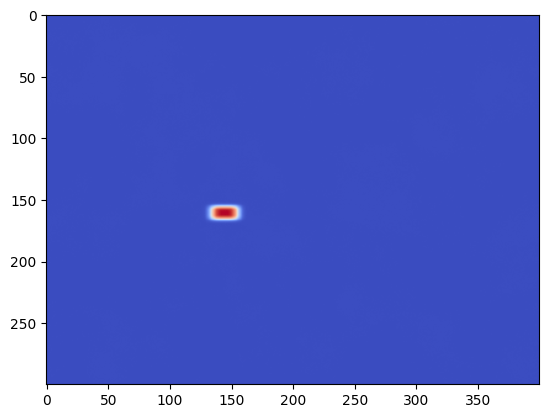

In [5]:
plt.imshow(agent.best.bl_det_image)

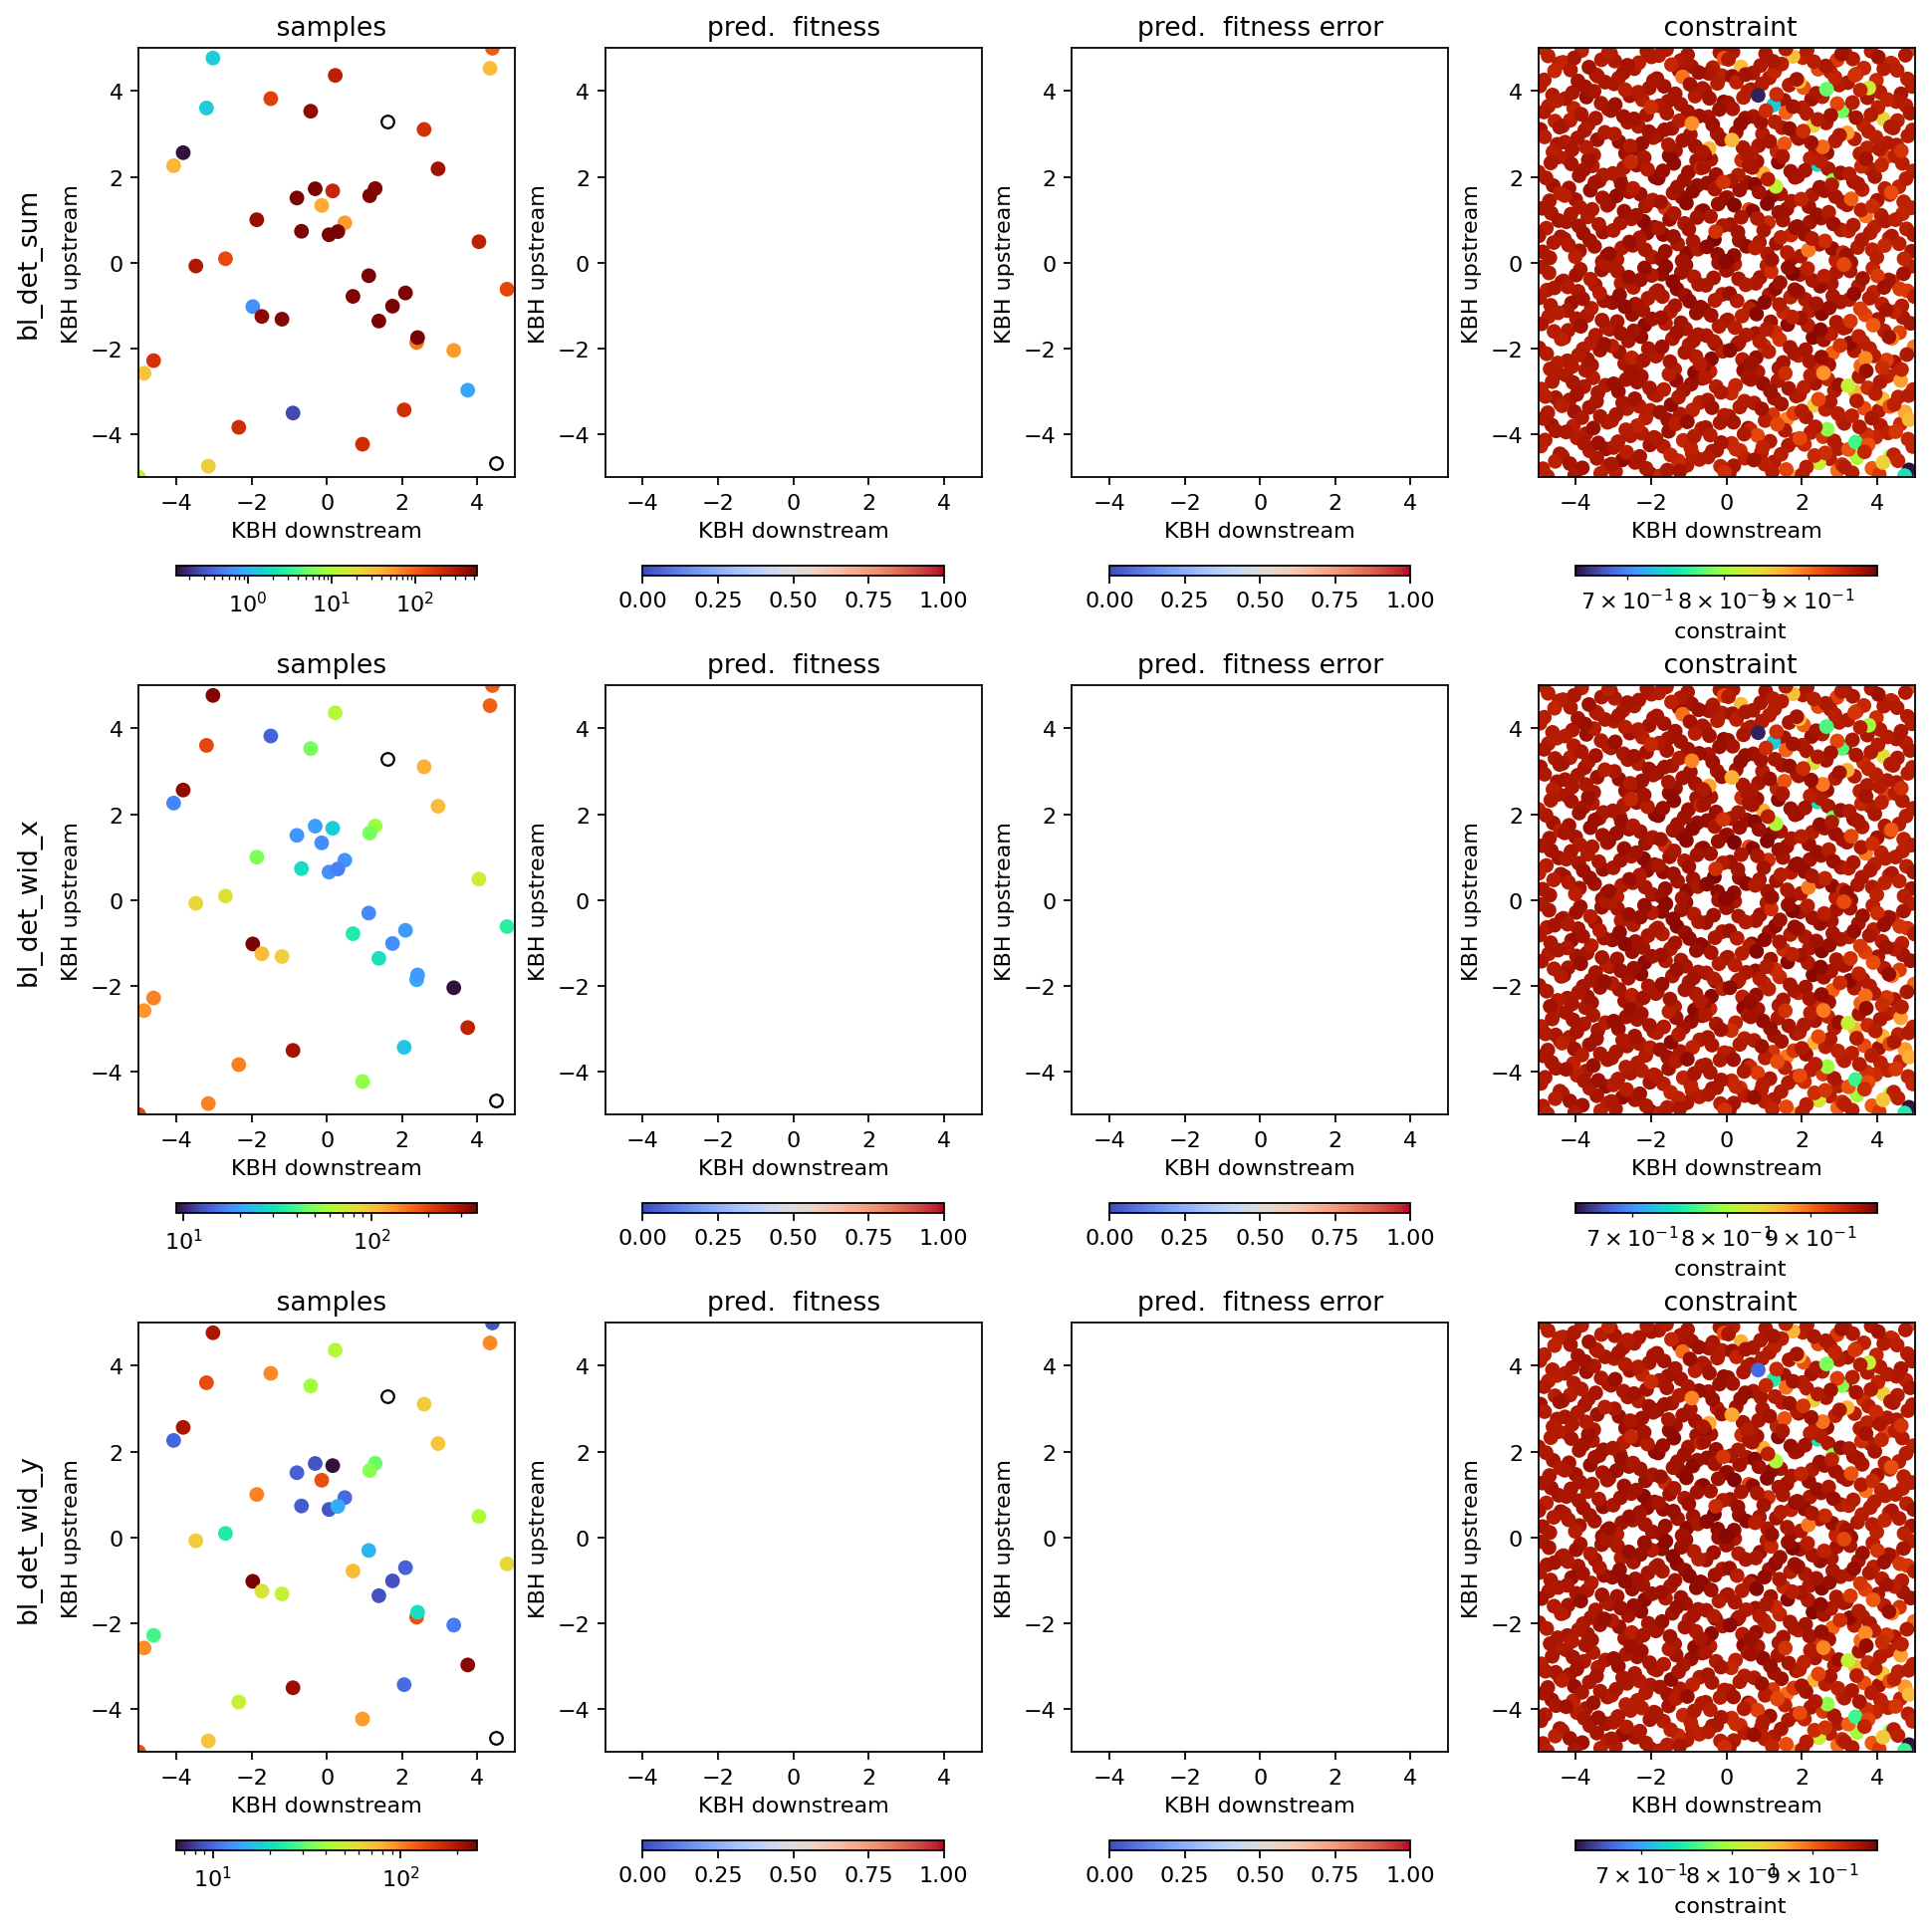

In [6]:
agent.plot_objectives(axes=(2, 3))